In [1]:
import tensorflow
from tensorflow import keras

dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()
len(imagens_treino)

60000

In [2]:
imagens_treino.shape

(60000, 28, 28)

Text(0.5, 1.0, '9')

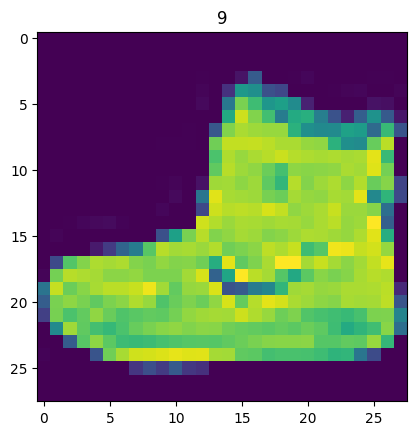

In [3]:
import matplotlib.pyplot as plt

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

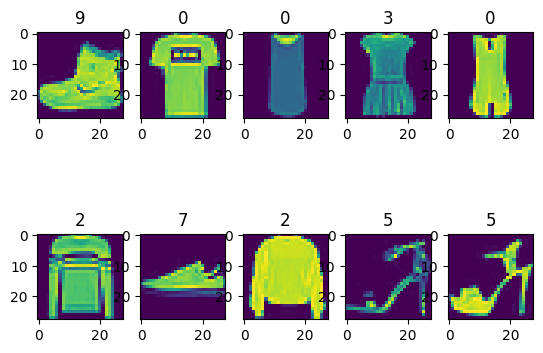

In [4]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_treino[imagem])

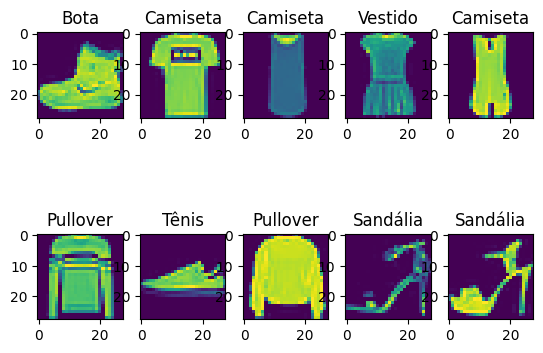

In [5]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [6]:
modelo = keras.Sequential(
    [
        # o que estamos fazendo aqui inicialmente é pegar uma imagem, passar as dimensões dela, após isso colocamos elas lado a lado e dizemos que essa é a camada 0, tudo isso dentro de um modelo sequencial.
        keras.layers.Flatten(input_shape=(28, 28)),
        # o que vamos fazer nessa segunda parte é que as camadas se  comuniquem entre si. Essa será a camada 1, e estamos passando o valor de pontos que irão se relacionar. É recomendável que se escolha valores múltiplos de 2.
        # o activation é qual função iremos usar para executar essa camada
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        # agora iremos criar o output do modelo
        # o valor 10 é porque temos 10 valores possíveis que as imagens podem ser
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
)

In [7]:
# para treinar o modelo primeiro, temos que compilar ele, indicando um otimizador e uma perca
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 8s 4ms/step - loss: 3.9471


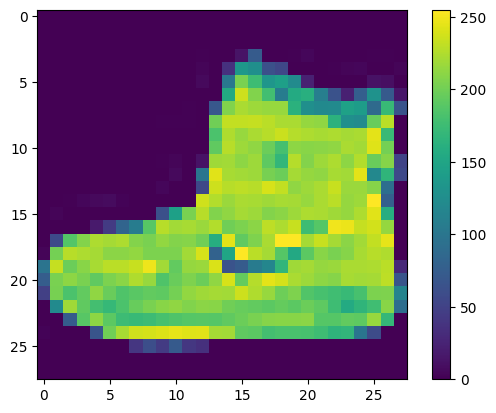

In [8]:
# vamos tentar melhorar a loss
plt.imshow(imagens_treino[0])
plt.colorbar()

In [9]:
# como vimos a imagem tem mais de 255 esclas de cores, por isso vamos colocar as imagens dentro de um intervalo menor
# o que fizemos foi normalizar as imagens
imagens_treino = imagens_treino / float(255)

In [10]:
modelo = keras.Sequential(
    [
        # o que estamos fazendo aqui inicialmente é pegar uma imagem, passar as dimensões dela, após isso colocamos elas lado a lado e dizemos que essa é a camada 0, tudo isso dentro de um modelo sequencial.
        keras.layers.Flatten(input_shape=(28, 28)),
        # o que vamos fazer nessa segunda parte é que as camadas se  comuniquem entre si. Essa será a camada 1, e estamos passando o valor de pontos que irão se relacionar. É recomendável que se escolha valores múltiplos de 2.
        # o activation é qual função iremos usar para executar essa camada
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        # agora iremos criar o output do modelo
        # o valor 10 é porque temos 10 valores possíveis que as imagens podem ser
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
)

In [11]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4835


In [12]:
# para terntarmos diminuir ainda mais nossa loss vamos criar mais camadas intermediárias até a saída
modelo = keras.Sequential(
    [
        # o que estamos fazendo aqui inicialmente é pegar uma imagem, passar as dimensões dela, após isso colocamos elas lado a lado e dizemos que essa é a camada 0, tudo isso dentro de um modelo sequencial.
        keras.layers.Flatten(input_shape=(28, 28)),
        # o que vamos fazer nessa segunda parte é que as camadas se  comuniquem entre si. Essa será a camada 1, e estamos passando o valor de pontos que irão se relacionar. É recomendável que se escolha valores múltiplos de 2.
        # o activation é qual função iremos usar para executar essa camada
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        # add mais camadas
        keras.layers.Dense(128, activation=tensorflow.nn.relu),
        keras.layers.Dense(64, activation=tensorflow.nn.relu),
        # agora iremos criar o output do modelo
        # o valor 10 é porque temos 10 valores possíveis que as imagens podem ser
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
)

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4854


Podemos concluir que não foi eficiente adicionar novas camadas nessas situações

In [13]:
modelo = keras.Sequential(
    [
        # o que estamos fazendo aqui inicialmente é pegar uma imagem, passar as dimensões dela, após isso colocamos elas lado a lado e dizemos que essa é a camada 0, tudo isso dentro de um modelo sequencial.
        keras.layers.Flatten(input_shape=(28, 28)),
        # o que vamos fazer nessa segunda parte é que as camadas se  comuniquem entre si. Essa será a camada 1, e estamos passando o valor de pontos que irão se relacionar. É recomendável que se escolha valores múltiplos de 2.
        # o activation é qual função iremos usar para executar essa camada
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        # agora iremos criar o output do modelo
        # o valor 10 é porque temos 10 valores possíveis que as imagens podem ser
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
)

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4846


In [14]:
# treinando o modelo mais de 1 vez
modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3665
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3295
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3071
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2866
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2712


In [15]:
# adicionando metricas 
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2605 - accuracy: 0.9044
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2457 - accuracy: 0.9072
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2376 - accuracy: 0.9102
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2293 - accuracy: 0.9136
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2208 - accuracy: 0.9175


In [16]:
testes = modelo.predict(imagens_teste)
testes[0]

313/313 [==============================] - 1s 2ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
import numpy as np
print(np.argmax(testes[0]))
print(identificacoes_teste[0])

9
9


In [18]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(perda_teste)
print(acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 61.9579 - accuracy: 0.8708
61.95787048339844
0.8708000183105469


In [19]:
# adicionando dados para validação
modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2064 - accuracy: 0.9235 - val_loss: 0.2122 - val_accuracy: 0.9222
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2005 - accuracy: 0.9244 - val_loss: 0.2249 - val_accuracy: 0.9153
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1958 - accuracy: 0.9261 - val_loss: 0.2263 - val_accuracy: 0.9133
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1873 - accuracy: 0.9293 - val_loss: 0.2286 - val_accuracy: 0.9158
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1835 - accuracy: 0.9301 - val_loss: 0.2352 - val_accuracy: 0.9133


In [20]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1748 - accuracy: 0.9346 - val_loss: 0.2214 - val_accuracy: 0.9193
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1708 - accuracy: 0.9359 - val_loss: 0.2459 - val_accuracy: 0.9111
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1631 - accuracy: 0.9393 - val_loss: 0.2285 - val_accuracy: 0.9163
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1606 - accuracy: 0.9394 - val_loss: 0.2568 - val_accuracy: 0.9100
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1557 - accuracy: 0.9410 - val_loss: 0.2582 - val_accuracy: 0.9082


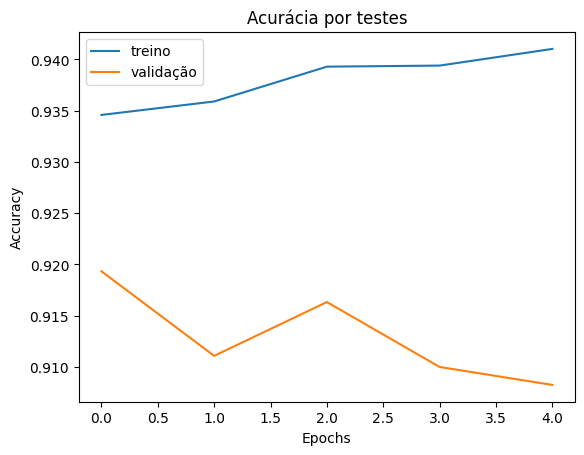

In [21]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por testes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['treino', 'validação'])

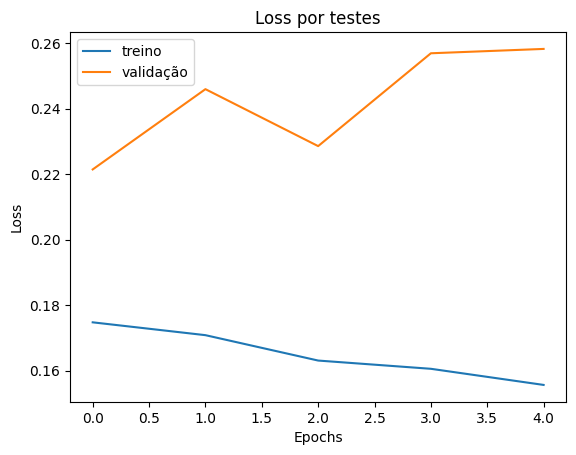

In [22]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss por testes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

In [23]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1517 - accuracy: 0.9425 - val_loss: 0.2500 - val_accuracy: 0.9133
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1472 - accuracy: 0.9436 - val_loss: 0.2576 - val_accuracy: 0.9133
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1426 - accuracy: 0.9470 - val_loss: 0.2533 - val_accuracy: 0.9111
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1394 - accuracy: 0.9476 - val_loss: 0.2773 - val_accuracy: 0.9072
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1370 - accuracy: 0.9486 - val_loss: 0.2603 - val_accuracy: 0.9121
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1335 - accuracy: 0.9502 - val_loss: 0.2577 - val_accuracy: 0.9146
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1292 - accuracy: 0.9507 - val_loss: 0.2611 - val_accuracy:

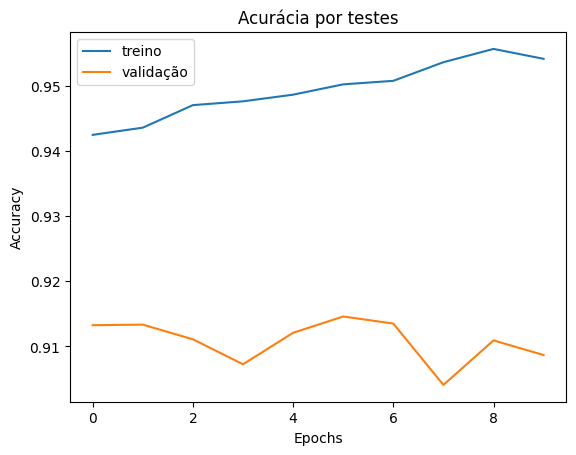

In [24]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por testes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['treino', 'validação'])

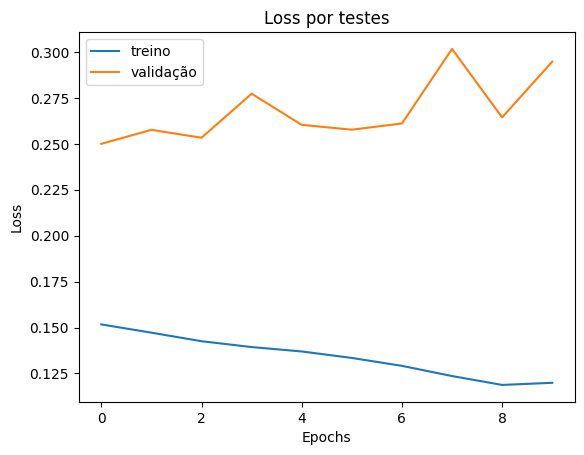

In [25]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss por testes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

Adicionando mais camadas, só que com dropout, que basicamente são pontos que pegam menos informação

In [26]:
modelo = keras.Sequential(
    [
        # o que estamos fazendo aqui inicialmente é pegar uma imagem, passar as dimensões dela, após isso colocamos elas lado a lado e dizemos que essa é a camada 0, tudo isso dentro de um modelo sequencial.
        keras.layers.Flatten(input_shape=(28, 28)),
        # o que vamos fazer nessa segunda parte é que as camadas se  comuniquem entre si. Essa será a camada 1, e estamos passando o valor de pontos que irão se relacionar. É recomendável que se escolha valores múltiplos de 2.
        # o activation é qual função iremos usar para executar essa camada
        keras.layers.Dense(256, activation=tensorflow.nn.relu),
        # droout
        keras.layers.Dropout(0.2),
        # agora iremos criar o output do modelo
        # o valor 10 é porque temos 10 valores possíveis que as imagens podem ser
        keras.layers.Dense(10, activation=tensorflow.nn.softmax)
    ]
)

In [27]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5261 - accuracy: 0.8123 - val_loss: 0.4238 - val_accuracy: 0.8476
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3972 - accuracy: 0.8545 - val_loss: 0.3770 - val_accuracy: 0.8618
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3636 - accuracy: 0.8670 - val_loss: 0.3459 - val_accuracy: 0.8749
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3370 - accuracy: 0.8766 - val_loss: 0.3504 - val_accuracy: 0.8737
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3233 - accuracy: 0.8800 - val_loss: 0.3335 - val_accuracy: 0.8801


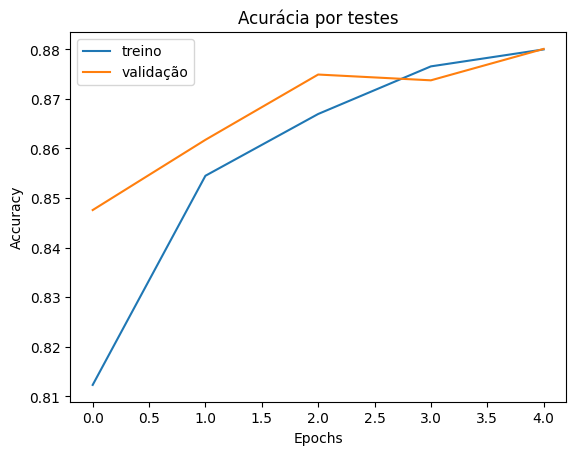

In [28]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por testes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['treino', 'validação'])

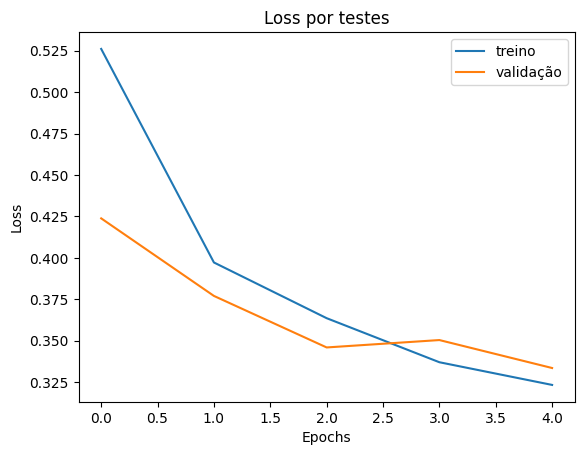

In [29]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss por testes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

In [30]:
modelo.save('modelo.h5')

In [31]:
from tensorflow.keras.models import load_model

modelo = load_model('modelo.h5')

In [32]:
sumario_do_modelo = modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [33]:
pesos_camada_dense = modelo.layers[1].get_weights()

In [41]:
# pesos do modelo
pesos_camada_dense = pesos_camada_dense[0]

In [42]:
# vieses do modelo
vieses_camada_dense = pesos_camada_dense[1]

In [43]:
# zerando os valores dos pesos
pesos_camada_dense.shape

(784, 256)

In [45]:
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_zerados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

In [48]:
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 0.05961909, -0.03329409,  0.03376867, -0.02599415, -0.07969581,
         0.00541561, -0.03079544,  0.0491096 ,  0.06553763, -0.10140368,
        -0.03441003,  0.04063338,  0.11977702,  0.11683004,  0.02421985,
         0.07094505, -0.0823632 , -0.14320849,  0.03048636, -0.08648355,
         0.21625428, -0.01471893, -0.13921392,  0.02935739, -0.07702019,
        -0.03329016, -0.16594511, -0.05864421,  0.12947243,  0.05916544,
         0.10096193, -0.07959675, -0.02379683, -0.08342991, -0.07539134,
        -0.03972676, -0.04158524, -0.03006266,  0.11815414,  0.01772967,
        -0.07607247,  0.1027426 , -0.11396939,  0.05971179, -0.01837046,
        -0.08588542,  0.07221515,  0.14007962, -0.06390952, -0.06515395,
      

In [49]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5343 - accuracy: 0.8082 - val_loss: 0.4205 - val_accuracy: 0.8496
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4117 - accuracy: 0.8493 - val_loss: 0.3795 - val_accuracy: 0.8633
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3792 - accuracy: 0.8617 - val_loss: 0.3968 - val_accuracy: 0.8545
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3576 - accuracy: 0.8674 - val_loss: 0.3492 - val_accuracy: 0.8748
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3374 - accuracy: 0.8745 - val_loss: 0.3422 - val_accuracy: 0.8767


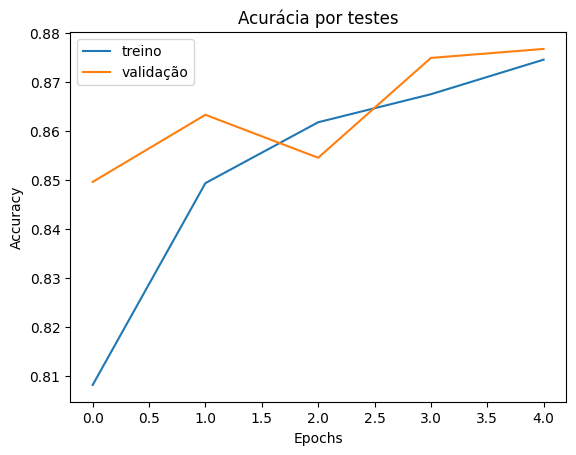

In [50]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por testes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['treino', 'validação'])

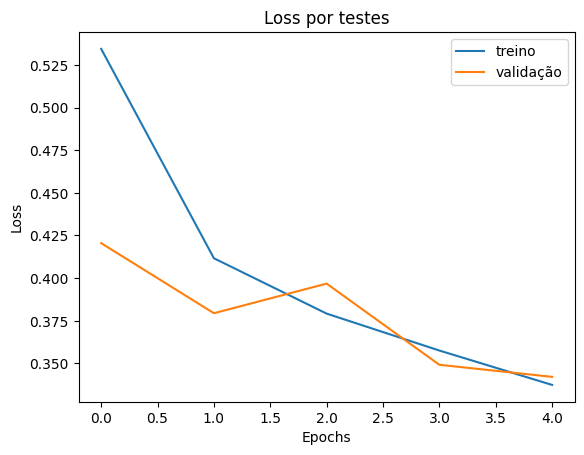

In [51]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss por testes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

In [57]:
# pesso aleatorios
pesos_camada_dense_aleatorios = np.random.rand(784, 256)
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

In [58]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 38.4083 - accuracy: 0.4040 - val_loss: 6.6164 - val_accuracy: 0.6202
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 11.2195 - accuracy: 0.5824 - val_loss: 4.3237 - val_accuracy: 0.6897
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 6.0007 - accuracy: 0.6444 - val_loss: 3.1808 - val_accuracy: 0.7051
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 3.8393 - accuracy: 0.6833 - val_loss: 1.9760 - val_accuracy: 0.7641
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3182 - accuracy: 0.7170 - val_loss: 1.7419 - val_accuracy: 0.7579


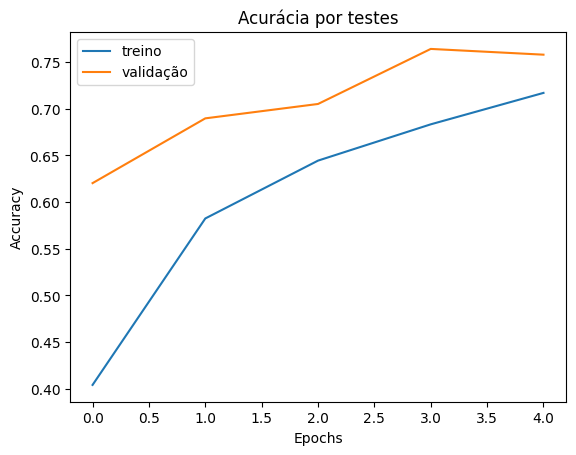

In [59]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por testes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['treino', 'validação'])

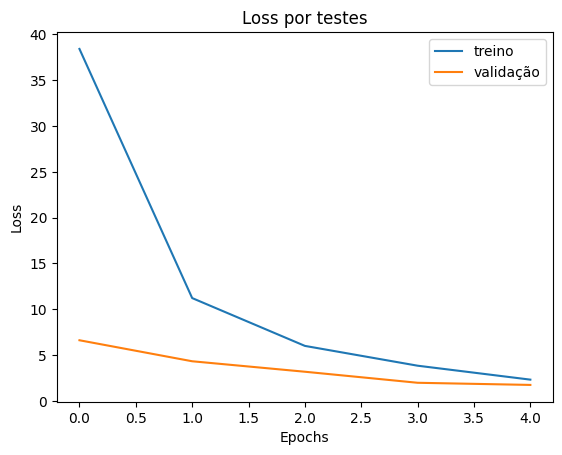

In [60]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss por testes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

In [56]:
modelo.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_4_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_4',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_10',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
   

In [61]:
# alterando vieses
vieses_camada_dense.shape

(256,)

In [62]:
vieses_camada_dense_zerados = np.zeros((256,))

In [63]:
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])

In [64]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.9927 - accuracy: 0.1001 - val_loss: 2.6132 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 2.4541 - accuracy: 0.1001 - val_loss: 2.3576 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3238 - accuracy: 0.1001 - val_loss: 2.3065 - val_accuracy: 0.0995
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3038 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3029 - val_accuracy: 0.0957


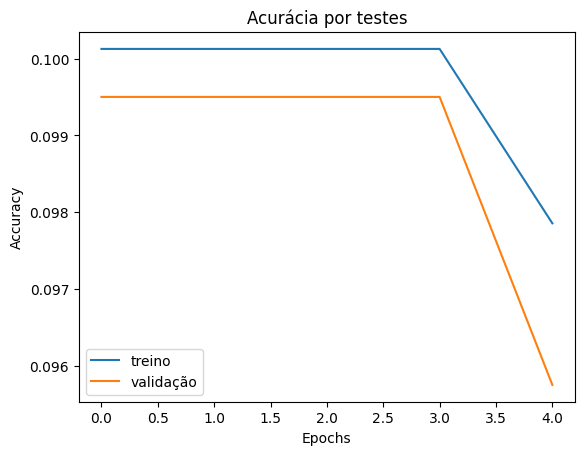

In [67]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por testes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['treino', 'validação'])

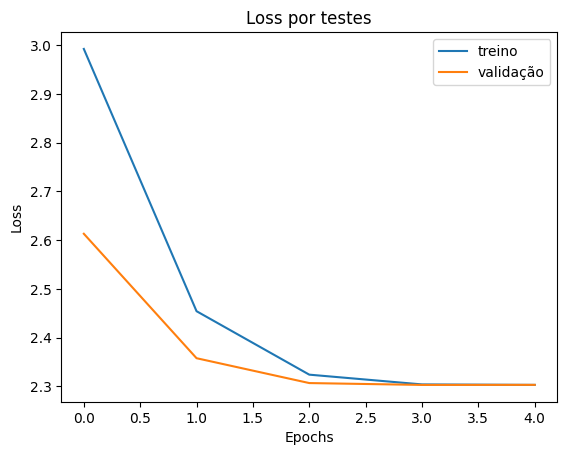

In [68]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss por testes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['treino', 'validação'])

In [74]:
adam = keras.optimizers.Adam(learning_rate=0.002)
calbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'), keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)]
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=480, epochs=5, validation_split=0.2, callbacks=calbacks)

Epoch 1/5
100/100 [==============================] - 2s 14ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 2/5
100/100 [==============================] - 1s 11ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0957
